##Kaggle Survey
- kaggle에서 매년 Kaggle 사용자들을 중심으로 설문조사를 시행합니다. 해당 설문조사 내용에는 Data Scientist들이 어떻게 이랗고 어떤 것들을 공부하는지 알 수 있는 내용이 담겨있습니다.

### 분석목표
1. Kaggle 설문조사에서 전 세계 사람들이 가장 많이 사용하는 프로그래밍 언어는 무엇인지 찾아보기

2. Kaggle 설문조사에서 전 세계 사람들이 가장 많이 사용하는 Machine Learning WorkFlow는 무엇인지 찾아보기

### 1. 라이브러리 및 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100 #panadas 경우 row가 길 경우 중간에 짤리게 되는데 이를 100개 까지 보여주는 함수수

import warnings
warnings.filterwarnings('ignore') # warning 경고 뜨는 것을 무시하라는 라이브러리리

In [3]:
data = pd.read_csv('/content/drive/MyDrive/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
data

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data[:1].values

array([['Duration (in seconds)', 'What is your age (# years)?',
        'What is your gender? - Selected Choice',
        'In which country do you currently reside?',
        'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
        'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
        'For how many years have you been writing code and/or programming?',
        'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
        'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
        'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
        'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C',
        'What programming languages do you use on a

- 설문지의 질문 내용에 대해서 얻을 수 있는 것들에 대해서 추출해보았다.\
나이, 성별, 나라, 학위, 직무,  사용 프로그래밍 언어, 개발환경 \
컴퓨터 플랫폼환경(GPU, TPU 등), 사용하는 머신러닝&딥러닝 워크플로우  , 5년간 클라우드 컴퓨팅 사용회사 등에 대해 조사가 되어있고 이것에 대한 EDA를 진행해보고자 한다.

In [5]:
data.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Time from Start to Finish (seconds)  25974 non-null  object
 1   Q1                                   25974 non-null  object
 2   Q2                                   25974 non-null  object
 3   Q3                                   25974 non-null  object
 4   Q4                                   25974 non-null  object
 5   Q5                                   25974 non-null  object
 6   Q6                                   25974 non-null  object
 7   Q7_Part_1                            21861 non-null  object
 8   Q7_Part_2                            5335 non-null   object
 9   Q7_Part_3                            10757 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


- 해당 데이터 셋은 칼럼의 갯수가 많을 뿐더러 각 칼럼에서 중복되지 않게끔 하기 위해 Nan 값이 들어있다. 
그렇기에 결측값을 제거하지 않고, 사용하는 프로그래밍 언어를 중복해서 나타내주는 새로운 칼럼을 만들어야 할 듯 하다.

---

### 3. 한국사람 찾기

In [51]:
korean= data[data['Q3']=='South Korea']
korean

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
276,509,22-24,Man,South Korea,Bachelor’s degree,Other,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,997,50-54,Man,South Korea,Master’s degree,Program/Project Manager,20+ years,Python,NaN,SQL,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,670,30-34,Man,South Korea,Bachelor’s degree,Student,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
482,948,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
492,756,45-49,Man,South Korea,Master’s degree,Currently not employed,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25497,339,25-29,Man,South Korea,Master’s degree,Student,3-5 years,Python,NaN,SQL,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25628,142,25-29,Man,South Korea,Bachelor’s degree,Machine Learning Engineer,< 1 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25842,12540,25-29,Man,South Korea,Master’s degree,Data Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25867,524,45-49,Prefer not to say,South Korea,Doctoral degree,Research Scientist,5-10 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Man                  283
Woman                 72
Prefer not to say      4
Name: Q2, dtype: int64


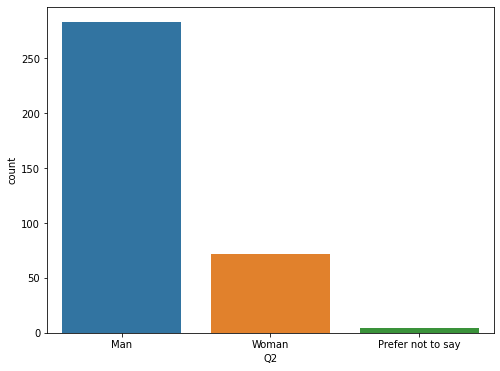

In [53]:
# 한국사람 성별에 대한 그래프 나타내기
print(korean['Q2'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(data=korean, x='Q2')
plt.show()

Bachelor’s degree                                                    127
Master’s degree                                                       92
Doctoral degree                                                       55
Some college/university study without earning a bachelor’s degree     52
No formal education past high school                                  15
I prefer not to answer                                                12
Professional doctorate                                                 6
Name: Q4, dtype: int64


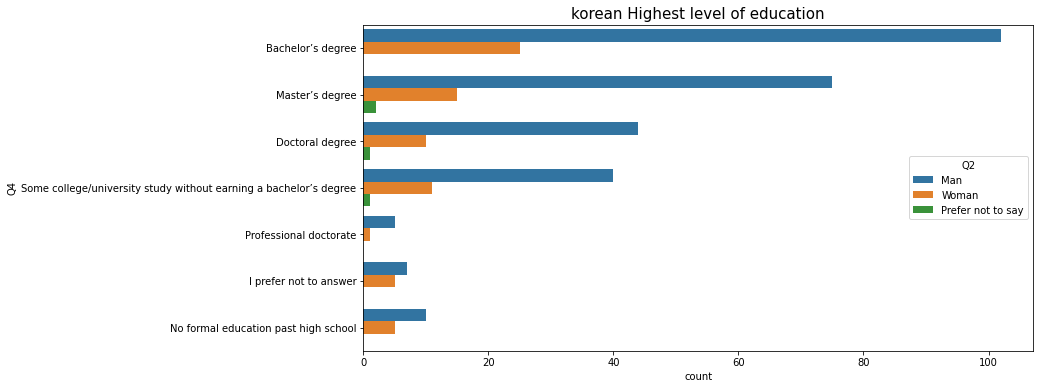

In [85]:
# 한국인의 성별에 따른 최종학력 그래프로 나타내기
print(korean['Q4'].value_counts())
plt.figure(figsize=(12,6))
plt.title('korean Highest level of education',fontsize='15')
sns.countplot(data=korean, y='Q4', hue='Q2')
plt.show()


### 3. 각 나라별 학력 및 현재 직업(직무) 통계 구하기

- pivot table을 이용해서 나라별 통계 계산하기

In [96]:
country_edu=pd.pivot_table(data=data[1:], index='Q3', columns='Q4', aggfunc={'Q4':'count'}, fill_value=0)

country_edu

Q4  \
Q4                                                 Bachelor’s degree   
Q3                                                                     
Algeria                                                            3   
Argentina                                                         47   
Australia                                                         79   
Austria                                                           10   
Bangladesh                                                       172   
Belarus                                                           19   
Belgium                                                            9   
Brazil                                                           285   
Canada                                                           104   
Chile                                                             39   
China                                                            217   
Colombia                                                          84   
Czech Republic                                                    10   
Denmark                                                            8   
Ecuador                                                           14   
Egypt                                                            292   
Ethiopia                                                          13   
France                                                            21   
Germany                                                           68   
Ghana                                                             49   
Greece                                                            19   
Hong Kong (S.A.R.)                                                26   
I do not wish to disclose my location                             17   
India                                                           4008   
Indonesia                                                        227   
Iran, Islamic Republic of...                                      47   
Iraq                                                               7   
Ireland                                                           17   
Israel                                                            36   
Italy                                                             49   
Japan                                                            241   
Kazakhstan                                                        18   
Kenya                                                            164   
Malaysia                                                          78   
Mexico                                                            89   
Morocco                                                           15   
Nepal                                                             35   
Netherlands                                                       34   
Nigeria                                                          363   
Norway                                                            10   
Other                                                            420   
Pakistan                                                         237   
Peru                                                              41   
Philippines                                                       59   
Poland                                                            43   
Portugal                                                          21   
Romania                                                           10   
Russia                                                           206   
Saudi Arabia                                                      42   
Singapore                                                         84   
South Africa                                                      63   
South Korea                                                      127   
Spain                                                             86   
Sri Lanka                         

In [99]:
country_Task=pd.pivot_table(data=data[1:], index='Q3', columns='Q5', aggfunc={'Q5':'count'}, fill_value=0)
country_Task

Q5  \
Q5                                                 Business Analyst   
Q3                                                                    
Algeria                                                           2   
Argentina                                                        10   
Australia                                                        11   
Austria                                                           2   
Bangladesh                                                        9   
Belarus                                                           1   
Belgium                                                           1   
Brazil                                                           46   
Canada                                                           13   
Chile                                                             8   
China                                                            27   
Colombia                                                         12   
Czech Republic                                                    2   
Denmark                                                           1   
Ecuador                                                           4   
Egypt                                                            14   
Ethiopia                                                          0   
France                                                           13   
Germany                                                          11   
Ghana                                                             2   
Greece                                                            4   
Hong Kong (S.A.R.)                                                4   
I do not wish to disclose my location                             2   
India                                                           231   
Indonesia                                                        18   
Iran, Islamic Republic of...                                      8   
Iraq                                                              0   
Ireland                                                           4   
Israel                                                            4   
Italy                                                            17   
Japan                                                            38   
Kazakhstan                                                        1   
Kenya                                                            11   
Malaysia                                                          6   
Mexico                                                           19   
Morocco                                                           2   
Nepal                                                             0   
Netherlands                                                       7   
Nigeria                                                          30   
Norway                                                            1   
Other                                                            46   
Pakistan                                                         11   
Peru                                                              8   
Philippines                                                       5   
Poland                                                           11   
Portugal                                                          7   
Romania                                                           1   
Russia                                                           40   
Saudi Arabia                                                      5   
Singapore                                                        10   
South Africa                                                      3   
South Korea                                                      12   
Spain                                                            20   
Sri Lanka                                                         2   
Sweden            

    Q5                          
Q5  Business Analyst                12
    Currently not employed          22
    DBA/Database Engineer            1
    Data Analyst                    30
    Data Engineer                   14
    Data Scientist                  42
    Developer Relations/Advocacy     0
    Machine Learning Engineer       36
    Other                           25
    Product Manager                  8
    Program/Project Manager         16
    Research Scientist              22
    Software Engineer               29
    Statistician                     4
    Student                         98
Name: South Korea, dtype: int64

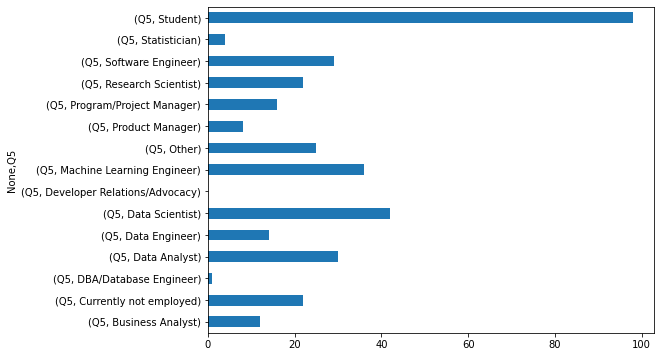

In [107]:
# 한국인의 직무 분포그래프
display(country_Task.loc['South Korea'])

plt.figure(figsize=(8,6))
country_Task.loc['South Korea'].plot(kind='barh')
plt.show()

### 4. 프로그래밍 언어 선호도 분석

In [6]:
# Q7로 시작하는 것이 프로그래밍 언어 선호도에 대해 나온 내용이므로, Q7에 대한 칼럼을 추출한다.

Q7_data=data.columns[data.columns.str.startswith('Q7')] 
Q7_data

Index(['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'],
      dtype='object')

In [7]:
data.columns[data.columns.str.contains('Q7')]

Index(['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER'],
      dtype='object')

- data.columns[data.columns.str.startswith('column명')]
- data.columns[data.columns.str.contains['column명']] 
- 두 가지의 방법 모두 사용 가능하다.

In [8]:
survey=data[['Q3']+list(Q7_data)] # data[['column']+['column']] 은 이어붙이기가 가능하다.
survey

,Q3,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
0,In which country do you currently reside?,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...
1,India,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indonesia,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pakistan,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mexico,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,Egypt,Python,NaN,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
25970,China,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,United States of America,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# 새로운 Programming Language 칼럼 만들기
Q7_list= []

for _,row in survey[Q7_data][1:].iterrows():
  Q7_list.append(row[~row.isnull()].values.tolist())

Q7_list[:3]  

[['Python', 'R'], ['SQL', 'C', 'C++', 'Java'], ['Python', 'C++', 'Java']]

In [126]:
survey["PL"]=['PL']+Q7_list   #'PL' 칼럼을 만들어주고 그 안에 리스트를 나열한다.

survey

,Q3,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,PL
0,In which country do you currently reside?,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,PL
1,India,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Python, R]"
2,Indonesia,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[SQL, C, C++, Java]"
3,Pakistan,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Python, C++, Java]"
4,Mexico,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Python]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,Egypt,Python,NaN,SQL,NaN,NaN,NaN,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,"[Python, SQL, Javascript, Bash]"
25970,China,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Python]
25971,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
25972,United States of America,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Python, SQL]"


In [128]:
Q7_list1 = []

for i in Q7_list:
  Q7_list1= Q7_list1+i

Q7_list1[:5]  

['Python', 'R', 'SQL', 'C', 'C++']

In [130]:
from collections import Counter
counter = Counter(Q7_list1)
counter

Counter({'Python': 21860,
         'R': 5334,
         'SQL': 10756,
         'C': 4709,
         'C++': 5535,
         'Java': 4769,
         'MATLAB': 2935,
         'Javascript': 4332,
         'None': 319,
         'Other': 2575,
         'Bash': 2216,
         'Julia': 305,
         'Swift': 242})

In [132]:
df=pd.DataFrame({'Language':counter.keys(),'Count':counter.values()})
df

,Language,Count
0,Python,21860
1,R,5334
2,SQL,10756
3,C,4709
4,C++,5535
5,Java,4769
6,MATLAB,2935
7,Javascript,4332
8,None,319
9,Other,2575


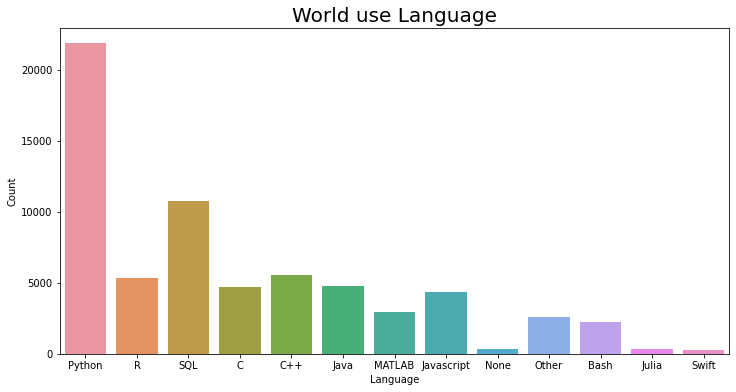

In [137]:
plt.figure(figsize=(12,6))
plt.title('World use Language', fontsize=20)
sns.barplot(data=df, x='Language', y='Count')
plt.show()

### 5.  Machine Learning Workflow 선호도 분석

In [165]:
pd.set_option('display.max_columns',None)

In [174]:
data_list=data.columns[data.columns.str.startswith('Q16')]
data_list

Index(['Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5',
       'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10',
       'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13', 'Q16_Part_14',
       'Q16_Part_15', 'Q16_Part_16', 'Q16_Part_17', 'Q16_OTHER'],
      dtype='object')

In [182]:
ML=data[['Q3']+list(data_list)]
ML

,Q3,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_OTHER
0,In which country do you currently reside?,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...
1,India,Scikit-learn,TensorFlow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caret,NaN,NaN,NaN,NaN,NaN,NaN
2,Indonesia,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mexico,Scikit-learn,TensorFlow,Keras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,Egypt,Scikit-learn,TensorFlow,Keras,PyTorch,NaN,NaN,Xgboost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PyTorch Lightning,NaN,NaN,NaN
25970,China,NaN,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,United States of America,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
WF = []

for _,row in ML[data_list][1:].iterrows():
  WF.append(row[~row.isnull()].values.tolist())

WF[:5]

[['  Scikit-learn ', '  TensorFlow ', ' Caret '],
 ['  Scikit-learn '],
 [],
 ['  Scikit-learn ', '  TensorFlow ', ' Keras '],
 ['  Scikit-learn ', ' PyTorch ', ' LightGBM ']]

In [185]:
ML['WorkFlow']=['WorkFlow']+WF

In [186]:
ML

,Q3,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_OTHER,WorkFlow
0,In which country do you currently reside?,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,WorkFlow
1,India,Scikit-learn,TensorFlow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caret,NaN,NaN,NaN,NaN,NaN,NaN,"[ Scikit-learn , TensorFlow , Caret ]"
2,Indonesia,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[ Scikit-learn ]
3,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,Mexico,Scikit-learn,TensorFlow,Keras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ Scikit-learn , TensorFlow , Keras ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,Egypt,Scikit-learn,TensorFlow,Keras,PyTorch,NaN,NaN,Xgboost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PyTorch Lightning,NaN,NaN,NaN,"[ Scikit-learn , TensorFlow , Keras , PyT..."
25970,China,NaN,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[ PyTorch ]
25971,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
25972,United States of America,Scikit-learn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[ Scikit-learn ]


In [187]:
Q16_list= []

for i in WF:
  Q16_list=Q16_list+i

Q16_list[:10]

['  Scikit-learn ',
 '  TensorFlow ',
 ' Caret ',
 '  Scikit-learn ',
 '  Scikit-learn ',
 '  TensorFlow ',
 ' Keras ',
 '  Scikit-learn ',
 ' PyTorch ',
 ' LightGBM ']

In [188]:
from collections import Counter

counter = Counter(Q16_list)
counter

Counter({'  Scikit-learn ': 13987,
         '  TensorFlow ': 9371,
         ' Caret ': 1009,
         ' Keras ': 7975,
         ' PyTorch ': 6088,
         ' LightGBM ': 2635,
         ' Fast.ai ': 824,
         ' Xgboost ': 5974,
         'Other': 439,
         ' CatBoost ': 1512,
         ' PyTorch Lightning ': 1060,
         ' H2O 3 ': 488,
         ' Huggingface ': 1122,
         'None': 1916,
         ' Prophet ': 800,
         ' Tidymodels ': 678,
         ' MXNet ': 252,
         ' JAX ': 190})

In [189]:
df=pd.DataFrame({'WorkFlow':counter.keys(), 'Count':counter.values()})

df

,WorkFlow,Count
0,Scikit-learn,13987
1,TensorFlow,9371
2,Caret,1009
3,Keras,7975
4,PyTorch,6088
5,LightGBM,2635
6,Fast.ai,824
7,Xgboost,5974
8,Other,439
9,CatBoost,1512


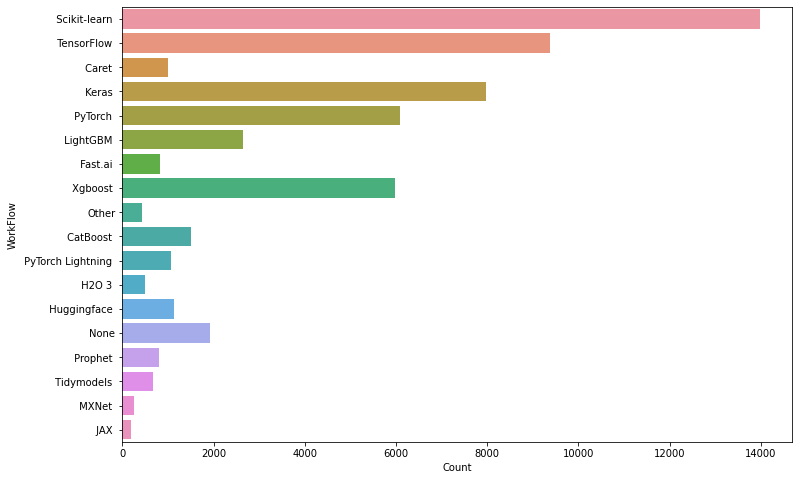

In [194]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, y='WorkFlow', x='Count')
plt.show()

### 6. 결론
1) 한국인 중에 남성은 283명 여성은 72명 정도 식별되었다.\
2) 최종학력은 학사가 가장 많았고 그 다음으로는 석사 박사 순으로 많았다. \
3) 한국인의 Kaggle 참여자 중 직무 분포를 보면 학생(98명)이 가장 많았고, 그 다음으로는 데이터 사이언티스트(42명), 머신러닝 엔지니어(36명) 순으로 많았다. \
4) 전 세계적으로 가장 많이 사용되는 언어는 'Python(21860명)'이고 두번째로는 'SQL(10756명)', 세번째는 'C++(5535명)'이었다. \
5) 전 세계적으로 가장 많이 사용되는 머신러닝 workflow는 'Scikit-learn(13987명)'이고 두번째로는 'Tensorflow (9371명)', 세번째로는 'Keras(7975명)'가 차지하였다. \
'Pytorch'는 6088명으로 4번째로 많이 사용되었는데, 아직까지는 Tensorflow가 더 많이 사용되는 workflow임을 알 수 있었다.
